In [1]:
import json
import random
import os

from itertools import product
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from collections import Counter, OrderedDict
from domain import *
from helper import *

splits = ['val', 'test', 'train']
evaluation = ['I', 'SS', 'LS', 'SL', 'LL']
max_op = 20
max_op_train = 10
max_value_train = 100
max_value_test = 10000

In [2]:
split2dataset = {}
for split in splits:
    split2dataset[split] = json.load(open('expr_%s.json'%split))
    
split2symset = {}
for split in splits:
    split2symset[split] = json.load(open('sym_%s.json'%split))

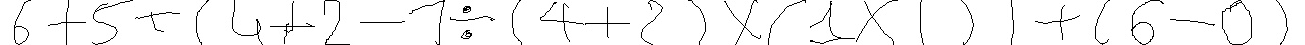

In [3]:
img = render_img(split2dataset['train'][-1035]['img_paths'])
display(img)

In [5]:
expr_img_folder = 'expr_images'
for split in splits:
    dataset = split2dataset[split]
    for sample in tqdm(dataset):
        expr_img = render_img(sample['img_paths'])
        file_name = sample['id'] + '.jpg'
        expr_img.save(os.path.join(expr_img_folder, file_name))
        sample['expr_image'] = file_name

100%|██████████████████████████████| 998000/998000 [29:22<00:00, 566.09it/s]


In [6]:
for split in splits:
    json.dump(split2dataset[split], open('expr_%s.json'%split, 'w'))

In [8]:
fewshot_dataset = json.load(open('fewshot_dataset.json'))

In [14]:
for fs, fs_dataset in fewshot_dataset.items():
    print(fs)
    for dataset in fs_dataset.values():
        for sample in tqdm(dataset):
            expr_img = render_img(sample['img_paths'])
            file_name = f'fs_{fs}_' + sample['id'] + '.jpg'
            expr_img.save(os.path.join(expr_img_folder, file_name))
            sample['expr_image'] = file_name
json.dump(fewshot_dataset, open('fewshot_dataset.json', 'w'))

  1%|▏                                     | 6/1100 [00:00<00:22, 48.84it/s]

x


  2%|▊                                   | 23/1100 [00:00<00:04, 217.73it/s]

y


  2%|▌                                   | 17/1000 [00:00<00:06, 162.72it/s]

a


  1%|▍                                   | 12/1000 [00:00<00:08, 117.50it/s]

b


  0%|                                      | 2/1000 [00:00<00:58, 16.92it/s]

c


  3%|▉                                   | 27/1000 [00:00<00:03, 265.13it/s]

d


100%|██████████████████████████████████| 4700/4700 [00:13<00:00, 337.00it/s]
